# Canny Edge Detection

Write a short report, with images of canny edge detection

In [1]:
# Import libraries
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import scipy.ndimage as ndimage

#Load in images
lenna = cv.imread('lenna.jpg', 0)
nature = cv.imread('nature.jpg', 0)
face = cv.imread('face.jpg', 0)

### Create a method for comparing images

In [2]:
def compareImages(orginalImage, cannyImage):
    fig = plt.figure(figsize=(18,18))

    ax1 = fig.add_subplot(1,2,1)
    ax1.imshow(orginalImage, cmap='gray')
    ax1.set_title("Original image")
    ax1.axis('off')

    ax2 = fig.add_subplot(1,2,2)
    ax2.imshow(cannyImage, cmap='gray')
    ax2.set_title("Canny edge detection")
    ax2.axis('off')

    plt.show()

##  1. Download two different images and try to create edge maps from both images using Canny 

Download at least two different images (one with clear and another one with "not so clear" edges) from the Internet and try to create edge maps from both images using Canny edge detection. Add screenshots from the original images as well as the  edge map images. Comment on your findings. 

I have choosen two images, lenna.jpg and nature.jpg. The lenna image has pretty clear defined edges that the canny edge detector should be able to detect. The nature.jpg image does not have as well defined edges, it is more detailed with the flowers in the foreground. Let's see how canny edge detector is able to handle these images. 

Let's start with a classic image lenna.jpg. To choose the min- and max-values I will calculate the mean value of pixels and add 30% to the max value and remove 30% from the min value.  

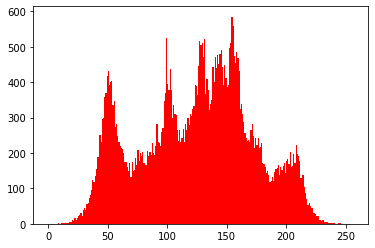

124.06253827160494 81.88127525925925 165.00317590123458


In [3]:
#blurr = cv.medianBlur(lenna, ksize=3)
plt.hist(lenna.flatten(),256,[0,256], color = 'r')
plt.show()
meanOfPixels = lenna.flatten().mean()
minValue = lenna.flatten().mean() * 0.66
maxValue = lenna.flatten().mean() * 1.33
print(meanOfPixels, minValue, maxValue)

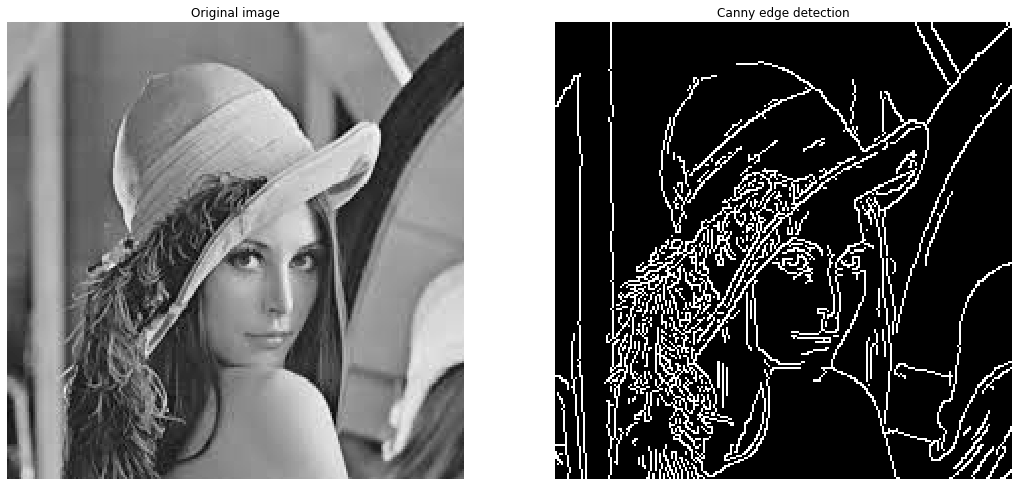

In [4]:
cannyEdgesLenna = cv.Canny(lenna,minValue,maxValue)
compareImages(lenna, cannyEdgesLenna)

### Lets try by using gaussian blur on the image

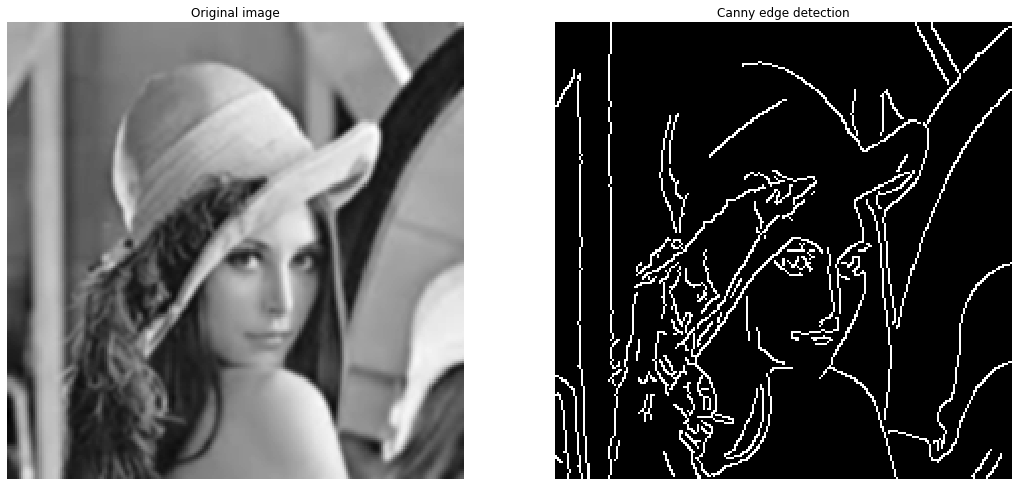

In [5]:
gaussianLenna = ndimage.gaussian_filter(lenna, sigma=1.05)
cannyEdgesLenna = cv.Canny(gaussianLenna,minValue,maxValue)
compareImages(gaussianLenna, cannyEdgesLenna)

By changing the min and max values i could not get the whole hat to have a coherent edge. I tried using median blur filter and/or histogram equalization, but lost some other edges in the process. On the seccond image i used Gaussianblur and it seemdd to work relatively well. The image has some clearer edges, but has lost many of the coherent edges. I think this result is very good on both of the images. The first one has most of the edges defined. I think the use of the 30% margin is a valid choice for the min and max values, it ofcourse will depend on the image. 

**Let's do the same to an image which does not have clear edges.** 

The nature pixture i've chosen has alot of flowers in the foreground and some mountains in the cloud sky. The edges of the mountains are somewhat clear but the edges around the foreground are very unclear. Let's calculate the min and maxvalues of the image and use the canny edge detector to try to create an edge map.

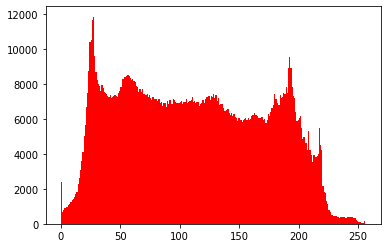

111.52139861111111 148.32346015277778 165.00317590123458


In [13]:
plt.hist(nature.flatten(),256,[0,256], color = 'r')
plt.show()
meanOfPixels = nature.flatten().mean()
minValue = nature.flatten().mean() * 0.66
minValue = nature.flatten().mean() * 1.33
print(meanOfPixels, minValue, maxValue)

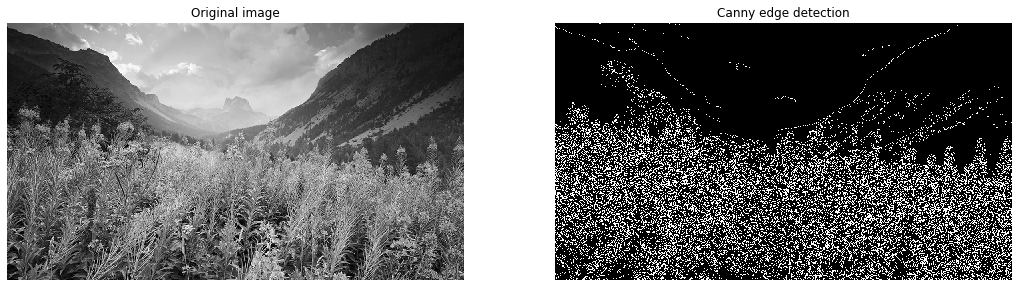

In [14]:
cannyEdgesNature = cv.Canny(nature,minValue,minValue)
compareImages(nature, cannyEdgesNature)

### Below is an example of the best edge detection I could do on the nature image

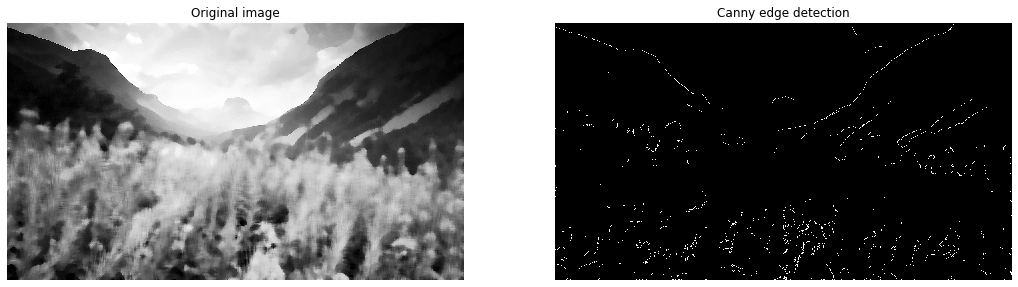

In [15]:
editedNature = cv.medianBlur(nature, ksize=21)
kernelLaplacian = np.array([[0.0,-1.0,0.0],[-1.0,5.0,-1.0],[0.0,-1.0,0.0]])
editedNature = cv.filter2D(editedNature, -1, kernelLaplacian)
editedNature = cv.equalizeHist(editedNature)
cannyEdgesEditNature = cv.Canny(editedNature,128,178)
compareImages(editedNature, cannyEdgesEditNature)

The result is a very noisy image with no clear edges. The patterns the flowers create are to complex for the canny edge detector to create coherent edges. The mountains in the background are somewhat hard to detect, which could be improved by changing the min and max values of the canny edge detector. 

When i tried to blur the images the edge maps lost some of the edges. I personally think the edge maps are much better this way. On some other images blurring might be the key for a clear edge map.

##  2. Now try to create an edge map from the image "face.jpg" that we used in in Assignment 4

Now try to create an edge map from the image "face.jpg" that we used in in Assignment 4. Again you need to apply some preprocessing of the image before applying Canny edge detection. Compare the results with the Sobel edge detector. Provide some suitable critical comments on how you obtained your final image (edge map). 

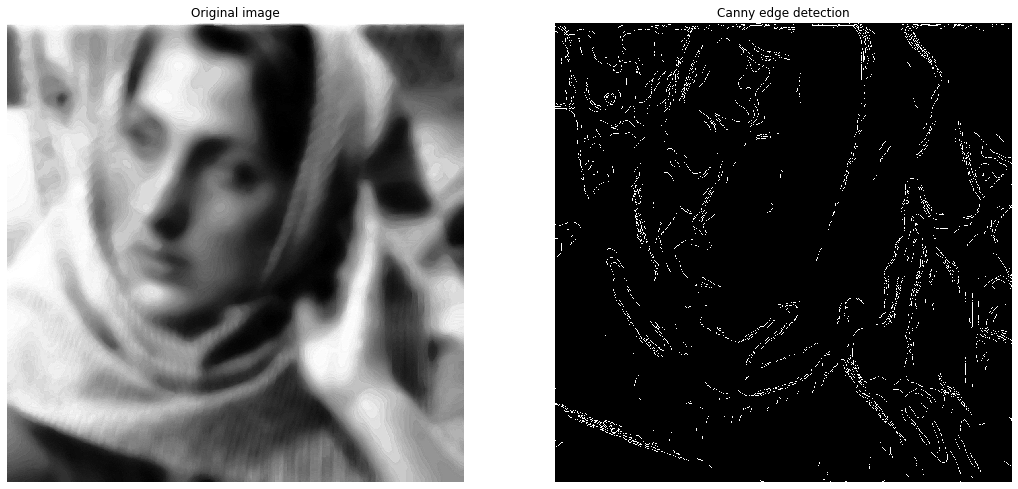

In [19]:
blurr = ndimage.gaussian_filter(blurr, sigma=1.05)
kernelLaplacian = np.array([[0.0,-1.0,0.0],[-1.0,5.0,-1.0],[0.0,-1.0,0.0]])
blurr = cv.filter2D(blurr, -1, kernelLaplacian)
blurr = cv.equalizeHist(blurr)
cannyEdgesFace = cv.Canny(blurr,45,80)
compareImages(blurr, cannyEdgesFace)

### Using median blur

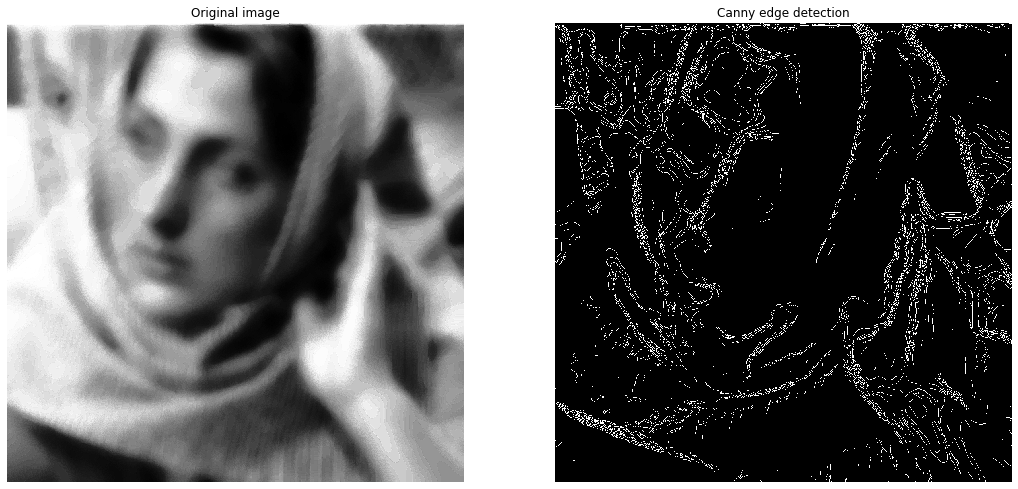

In [18]:
blurr = cv.medianBlur(face, ksize=21) # Median blur
kernelLaplacian = np.array([[0.0,-1.0,0.0],[-1.0,5.0,-1.0],[0.0,-1.0,0.0]])
blurr = cv.filter2D(blurr, -1, kernelLaplacian) #Laplacian sharpen 
blurr = cv.equalizeHist(blurr) # Histogram equalization
cannyEdgesFace = cv.Canny(blurr,45,80)
compareImages(blurr, cannyEdgesFace)

This image is very challenging, because of the noise, contrast and blurriness of the image. The 30% margin of the min and max values did not work well either on this image. I started by applying a medianblur, sharpen with laplcaian filter and finally used histogram equalization. The image done with median blur is the better edge map in my opinion, there is somewhat of a structure that resembles a face. The canny edge detector seems to be easily adaptable for different images.  With the sobel edge detector I personally think I achieved a better result. I tried to apply the same filters as with the sobel edge detector but got much worse results. 